In [9]:
import numpy as np
import torch
from torchvision.io import ImageReadMode, read_image
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [4]:
def show_image(x: torch.Tensor, ax=None):
    if x.dim() == 3:
        x = x.permute(1, 2, 0)
    
    if ax is None:
        plt.imshow(x)
    else:
        ax.imshow(x)

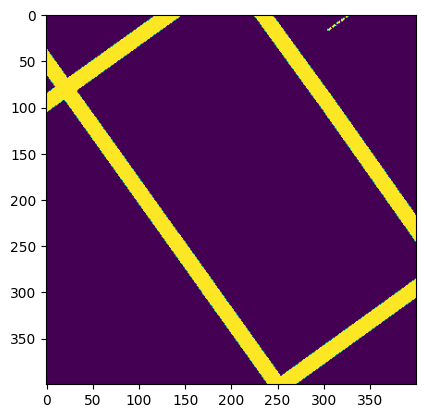

In [6]:
mask = read_image("../data/training/groundtruth/satimage_1.png")
show_image(mask)

In [10]:
def smooth_road_edge(mask: torch.Tensor, dist_max: int):
    for dist in range(1, dist_max):
        kernel = np.ones((3, 3))
        kernel = torch.from_numpy(kernel).type(torch.ByteTensor).unsqueeze(0).unsqueeze(0)
        out = F.conv2d(mask, kernel, padding=1, stride=1)
        out = out.type(torch.BoolTensor)

        result = (mask > 0) ^ out

        mask[result] = 255 - ((dist)/(dist_max+1))*255

    return mask

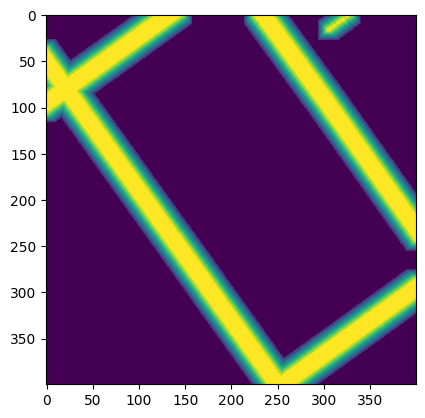

In [11]:
test_mask = read_image("../data/training/groundtruth/satimage_1.png")
test_mask = smooth_road_edge(test_mask, 11)

show_image(test_mask)